(480, 640, 3)
float64


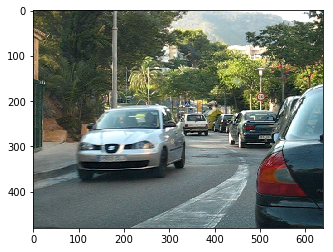

In [50]:
 # para que las imagenes se muestren automaticamente 
%matplotlib inline

#numpy es la libreria de arreglos de python (la llamaremos np)
import numpy as np
#el modulo io de skimage sirve para cargar y guardar imagenes
from skimage import io
# el modulo pyplot de matplotlib (que llamaremos plt) nos permite mostrar imagenes
import matplotlib.pyplot as plt

# leemos la imagen desde un archivo, y la almacenamos en memoria en un arreglo
image = io.imread('examples/car1.jpg')

image=image/255.

#imprimimos las dimensiones del arreglo. son 3: las dos primeras corresponden al alto y ancho, 
#la última a los canales de color (que son 3)
print(image.shape)
#guardamos las dimensiones en tres variables para usar en los scripts más abajo
h,w,c=image.shape

#mostramos el tipo de los elementos del arreglo
print(image.dtype)

#visualizamos la imagen
plt.imshow(image)


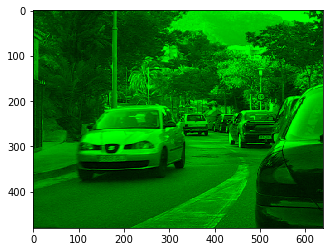

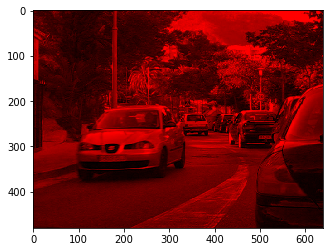

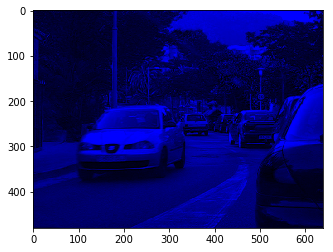

In [90]:
#Ver los canales individuales

#Anulo los canales rojo y azul para ver solo el verde
green=np.copy(image)
green[:,:,0]=0
green[:,:,2]=0
plt.figure()
plt.imshow(green)
           

#Anulo los canales azul y verde para ver solo el rojo
red=np.copy(image)
red[:,:,1:3]=0
plt.figure()
plt.imshow(red)

#Anulo los canales rojo y verde para ver solo el azul
blue=np.copy(image)
blue[:,:,0:2]=0
plt.figure()
plt.imshow(blue)




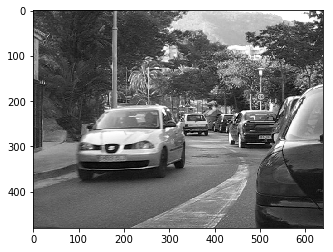

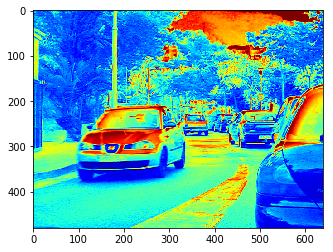

In [69]:
# Convertir en escala de grises

image_gray=np.zeros((h,w))

for i in range(h):
    for j in range(w):
        image_gray[i,j]= (image[i,j,0]+image[i,j,1]+image[i,j,2])/3

plt.imshow(image_gray,cmap=plt.get_cmap('gray'))
plt.figure()
plt.imshow(image_gray,cmap=plt.get_cmap('jet'))


def rgb2grayscale(image):
    h,w,c=image.shape
    image_gray=np.zeros((h,w))

    for i in range(h):
        for j in range(w):
            image_gray[i,j]= (image[i,j,0]+image[i,j,1]+image[i,j,2])/3
    return image_gray


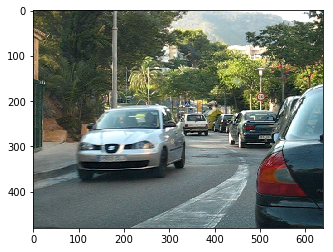

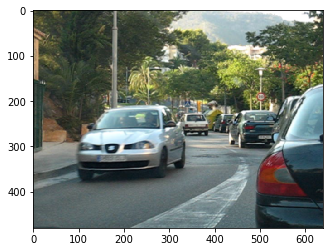

In [65]:
# Suavizar una imagen

# A cada pixel, le asignamos el promedio de los pixeles alrededor suyo.

#Coordenadas alrededor del pixel (i,j)

#####################################
# (i-1,j-1) # (i-1, j ) # (i-1,j+1) #
#####################################
# ( i ,j-1) # ( i , j ) # ( i ,j+1) #
#####################################
# (i+1,j-1) # (i+1, j ) # (i+1,j+1) #
#####################################

image_smooth=np.copy(image)

for i in range(1,h-1):#evitamos los bordes
    for j in range(1,w-1): #evitamos los bordes
        image_smooth[i,j,:]= (image[i-1,j-1,:]+image[i-1,j,:]+image[i-1,j+1,:]
                              +image[i,j-1,:]+image[i,j,:]+image[i,j+1,:]
                              +image[i+1,j-1,:]+image[i+1,j,:]+image[i+1,j+1,:]
                               )/9

plt.imshow(image)
plt.figure()
plt.imshow(image_smooth)




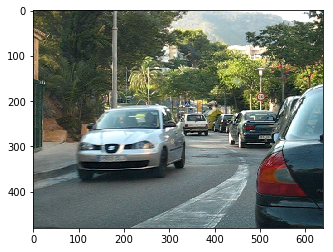

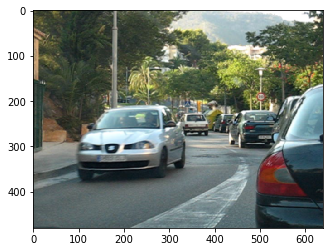

In [66]:
#suavizar una imagen -  en una funcion

import numba #usamos numba para que sea más rápido

@numba.jit #pre-compilamos la función a código de máquina para que sea más rápida
def smooth_image(image):    
    image_smooth=np.copy(image)

    for i in range(1,h-1):#evitamos los bordes
        for j in range(1,w-1): #evitamos los bordes
            image_smooth[i,j,:]= (image[i-1,j-1,:]+image[i-1,j,:]+image[i-1,j+1,:]
                                  +image[i,j-1,:]+image[i,j,:]+image[i,j+1,:]
                                  +image[i+1,j-1,:]+image[i+1,j,:]+image[i+1,j+1,:]
                                   )/9
    return image_smooth

image_smooth=smooth_image(image)

plt.imshow(image)
plt.figure()
plt.imshow(image_smooth)


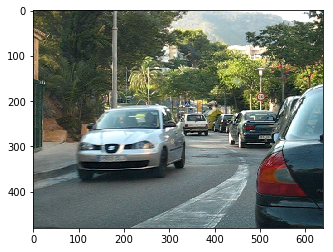

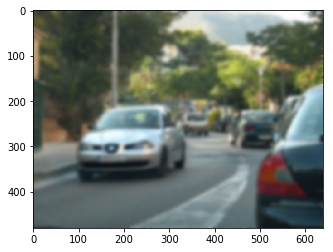

In [68]:
#suavizar una imagen varias veces

import numba #usamos numba para que sea más rápido

@numba.jit #pre-compilamos la función a código de máquina para que sea más rápida
def smooth_image(image):    
    image_smooth=np.copy(image)

    for i in range(1,h-1):#evitamos los bordes
        for j in range(1,w-1): #evitamos los bordes
            image_smooth[i,j,:]= (image[i-1,j-1,:]+image[i-1,j,:]+image[i-1,j+1,:]
                                  +image[i,j-1,:]+image[i,j,:]+image[i,j+1,:]
                                  +image[i+1,j-1,:]+image[i+1,j,:]+image[i+1,j+1,:]
                                   )/9
    return image_smooth


image_smooth=np.copy(image)
repetitions=20
for i in range(repetitions):
    image_smooth=smooth_image(image_smooth)

plt.imshow(image)
plt.figure()
plt.imshow(image_smooth)


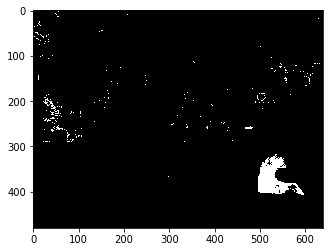

In [75]:
# Filtrar por color para buscar los rojos
h,w,c=image.shape
filter_mask=np.zeros((h,w))

for i in range(h):#evitamos los bordes
    for j in range(w): #evitamos los bordes
        r,g,b=image[i,j,:]
        if r>0.3 and g<0.3 and b<0.3:
            filter_mask[i,j]=1
            
plt.imshow(filter_mask,cmap=plt.get_cmap('gray'))            
        


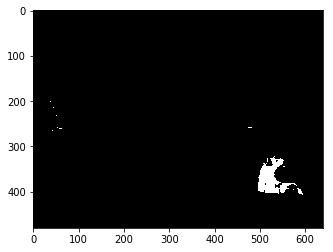

In [89]:
eroded_filter=np.zeros(filter_mask.shape)
# erosionar la mascara de filtro
for i in range(1,h-1):#evitamos los bordes
    for j in range(1,w-1): #evitamos los bordes
        pixel_count=(filter_mask[i-1,j-1]+filter_mask[i-1,j]+filter_mask[i-1,j+1] +filter_mask[i,j-1]+filter_mask[i,j]+filter_mask[i,j+1]+filter_mask[i+1,j-1]+filter_mask[i+1,j]+filter_mask[i+1,j+1])
        if pixel_count>8:
            eroded_filter[i,j]=1

plt.imshow(eroded_filter,cmap=plt.get_cmap('gray'))            


In [ ]:
import matplotlib.patches as patches

# Calcular centro de masa
eroded_filter=np.zeros(filter_mask.shape)
# erosionar la mascara de filtro
coordinate_sum=np.array([0,0])
count=0
for i in range(h):#evitamos los bordes
    for j in range(w): #evitamos los borde
        if eroded_filter[i,j]==1:
            coordinate_sum+=np.array([i,j])
            count+=1
center=coordinate_sum/count

figure()
plt.imshow(image,cmap=plt.get_cmap('gray'))
canvas = plt.gca()
rectangle=patches.Rectangle(
        (0.03, 0.1), 0.2, 0.6, fill=True)
canvas.add_patch()
